BerkeleyX: Data8.2x

Foundations of Data Science: Inferential Thinking by Resampling

Lab 2

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dungeons and Dragons and Sampling



In [2]:
# Question 1.1 - roll a 20-faced dice w/ modifier 11 against a 15

possible_rolls = np.arange(1, 21)
roll_result = np.random.choice(possible_rolls)
modifier = 11
modified_result = roll_result + modifier
fail_until = 15
action_succeeded = modified_result > fail_until

print("On a modified roll of {:d}, Alice's action {}.".
      format(modified_result, "succeeded" if action_succeeded else "failed"))

On a modified roll of 31, Alice's action succeeded.


In [3]:
# Question 1.2 - run it 7 times and give an estimation of success chances
counter = 7
successes = []
for _ in range(counter):
    successes.append(np.random.choice(possible_rolls) + modifier > fail_until)

rough_success_chance = sum(successes)/counter
print(successes, rough_success_chance)

[True, False, True, True, True, False, True] 0.7142857142857143


In [4]:
# Question 1.3

modifier = 11
num_observations = 7

def simulate_observations():
    """Produces an array of 7 simulated modified die rolls"""
    result = []
    for _ in range(num_observations):
        result.append(np.random.choice(possible_rolls) + modifier)
    return result

observations = simulate_observations()
observations

[27, 22, 18, 13, 25, 23, 28]

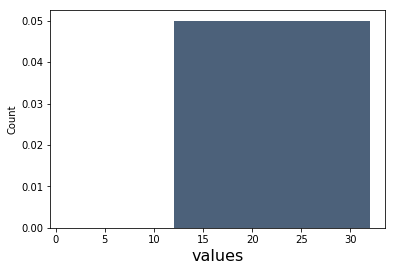

In [26]:
# Question 1.4 
# Draw a histogram to display the probability distribution of the modified rolls we might see.
roll_bins = np.arange(1, modifier+2+20, 1)
values = np.arange(1+modifier, 20+modifier+1)

rolls = Table().with_column('values', values)
rolls.hist('values', bins=roll_bins, normed=None, density=True)

In [28]:
# Question 1.5 
# estimate modifier from observations finding the smallest total roll
min_estimate = min(observations) - 1
min_estimate

12

In [38]:
# Question 1.6 
# Figure out a good estimate based on the mean of observations

def mean_based_estimator(nums):
    """Estimate the roll modifier based on observed modified rolls in the array nums."""
    return int(round(np.mean(nums)) - 10)

mean_based_estimate = mean_based_estimator(observations)
mean_based_estimate

12

Sampling

In [39]:
player_data = Table().read_table("../../data/player_data.csv")
salary_data = Table().read_table("../../data/salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")
# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


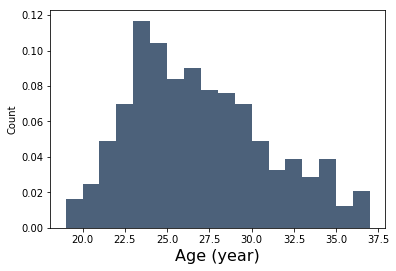

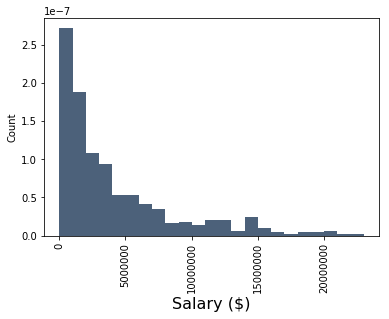

In [52]:
# Question 2.1. 
# Complete the histograms function,
# which takes a table with columns Age and Salary and draws a histogram for each one.
# Use the min and max functions to pick the bin boundaries
# so that all data appears for any table passed to your function.
# Use the same bin widths as before (1 year for Age and $1,000,000 for Salary).

def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = range(min(ages), max(ages))
    salary_bins = range(min(salaries), max(salaries), 1_000_000)
    t.hist('Age', bins=age_bins, unit='year', normed=None, density=True)
    t.hist('Salary', bins=salary_bins, unit='$', normed=None, density=True)
    
histograms(full_data)

array([2.65365854e+01, 4.26977577e+06])

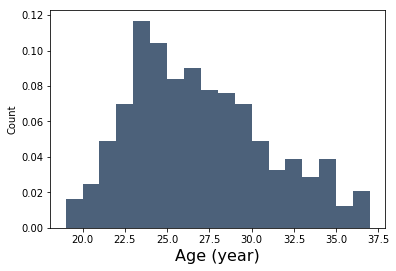

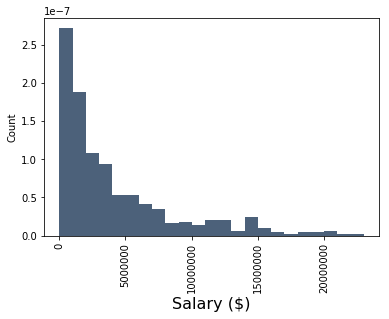

In [56]:
# Question 2.2. 
# Create a function called compute_statistics that takes a Table containing ages and salaries and:
# Draws a histogram of ages
# Draws a histogram of salaries
# Returns a two-element array containing the average age and average salary
def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)

    age = age_and_salary_data.column('Age')
    salary = age_and_salary_data.column('Salary')
    return np.array([np.mean(age), np.mean(salary)])

full_stats = compute_statistics(full_data)
full_stats

Convenience sampling

In [59]:
# Question 2.3 
# Assign convenience_sample_data to a subset of full_data
#  that contains only the rows for players under the age of 22
convenience_sample = full_data.where(full_data['Age'] < 22)
convenience_sample

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


array([2.03636364e+01, 2.38353382e+06])

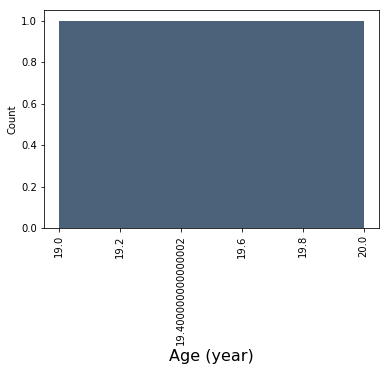

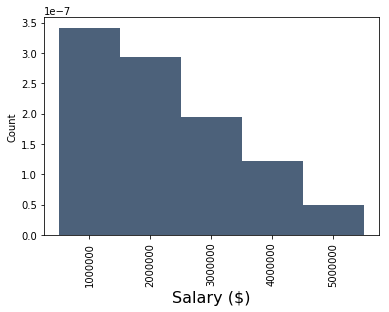

In [60]:
# Question 2.4 
# Assign convenience_stats to a list of the average age and average salary
#  of your convenience sample, using the compute_statistics function.
# Since they're computed on a sample, these are called sample averages.
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

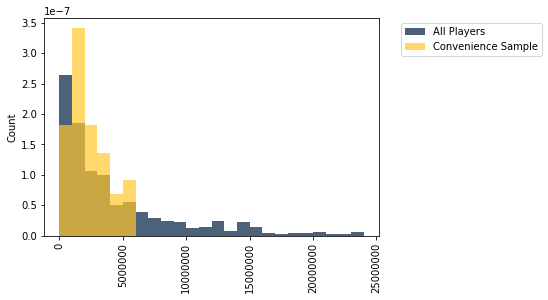

In [64]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    max_salary = max(np.append(first.column('Salary'), second.column('Salary')))
    bins = np.arange(0, max_salary+1e6+1, 1e6)
    first_binned = first.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin', normed=None, density=True)

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

Simple random sampling

_simple random sample without replacement_ or SRSWOR 

In [65]:
def load_data(salary_file):
    return player_data.join('Name', Table.read_table(salary_file), 'PlayerName')

Full data stats:                  [2.65365854e+01 4.26977577e+06]
Small simple random sample stats: [2.63181818e+01 4.28391089e+06]
Large simple random sample stats: [2.6420000e+01 4.8213225e+06]


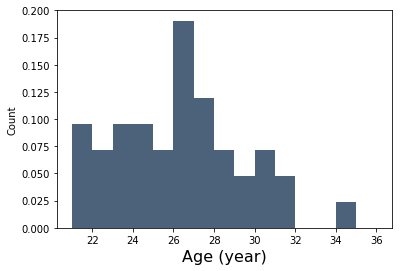

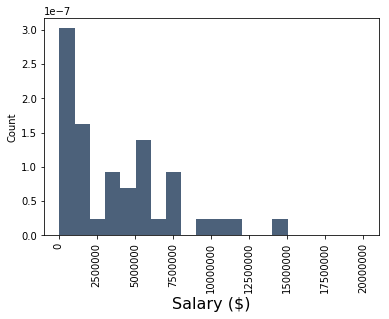

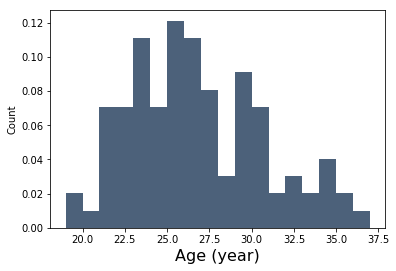

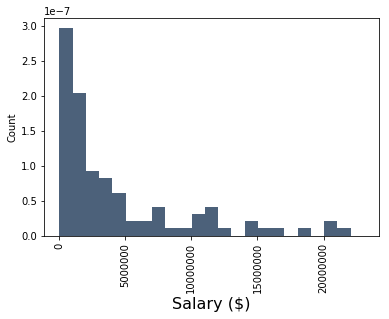

In [69]:
# Question 2.5 
# Run the same analyses on the small and large samples that you previously ran on the full dataset
# and on the convenience sample.
# Compare the accuracy of the estimates of the population statistics
#  that we get from the convenience sample, the small simple random sample,
#  and the large simple random sample.

small_srswor_data = load_data('../../data/small_srswor_salary.csv')
small_stats = compute_statistics(small_srswor_data)
large_srswor_data = load_data('../../data/large_srswor_salary.csv')
large_stats = compute_statistics(large_srswor_data)
print('Full data stats:                 ', full_stats)
print('Small simple random sample stats:', small_stats)
print('Large simple random sample stats:', large_stats)

Producing simple random samples

array([2.64545455e+01, 3.36749180e+06])

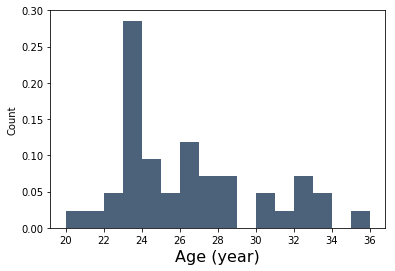

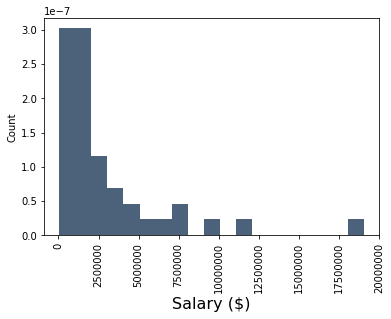

In [77]:
# Question 2.6 
# Produce a simple random sample of size 44 from full_data.
# Run your analysis on it again and think about these following questions.
# Are your results roughly similar to those in the small sample we provided you?
#  Run your code several times to get new samples.
# How much does the average age change across samples?
# What about average salary?
my_small_srswor_data = full_data.sample(44, with_replacement=False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

array([2.66700000e+01, 4.02248944e+06])

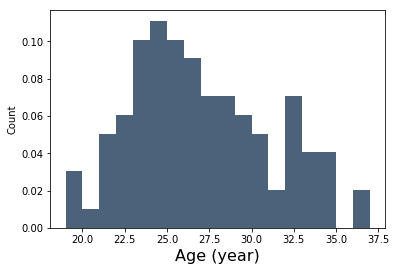

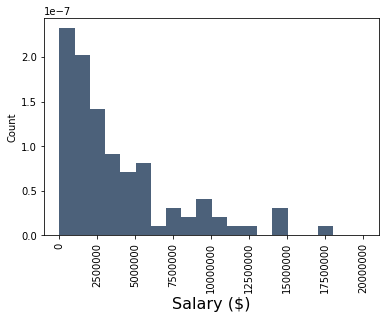

In [82]:
my_large_srswor_data = full_data.sample(100, with_replacement=False)
my_large_stats = compute_statistics(my_large_srswor_data)
my_large_stats